# Assignment: Predicting House Prices Using Regression Model

### Objectives

The goal of this assignment is to apply the concepts learned about regression models to predict house prices using a given dataset. You will use various regression models, evaluate their performance, and tune their hyperparameters.

### Dataset

Use the Boston Housing dataset, which is available in scikit-learn's datasets module.

### Instructions

1 Import necessary libraries and load the dataset.

2 Perform exploratory data analysis and preprocessing (e.g., check for missing values, visualize the data, etc.).

3 Split the dataset into training and testing sets.

4 Implement the following regression models:

    Simple Linear Regression (choose an appropriate feature)
    Multiple Linear Regression
    Polynomial Regression
    Ridge Regression
    Lasso Regression
    Support Vector Regression
    Decision Tree Regression
    Random Forest Regression
5 Evaluate the performance of each model using appropriate evaluation metrics, such as MAE, MSE, RMSE, R-squared, or Adjusted R-squared.

6 Perform cross-validation and hyperparameter tuning for the models that require it, using grid search or randomized search.

7 Compare the performance of the different models and discuss your findings.

8 Choose the best model based on the evaluation metrics and provide insights into its performance and predictions.

Submission: Prepare a report or Jupyter Notebook that includes your code, visualizations, results, and explanations for each step. The report should be well-organized, clear, and concise..

### Solution 1 - Loading Libraries

In [9]:
# Loading libraries
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt


In [11]:
# Importing data
data = pd.read_csv('housing.csv')

Looking at Data

In [12]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [13]:
data.shape

(506, 14)

In [4]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [14]:
data.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


### 2. Solution Explanatory Data analysis(EDA)

C:\Users\Cecilia Mwaura\AppData\Local\Temp\ipykernel_5480\2127794990.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['MEDV']);


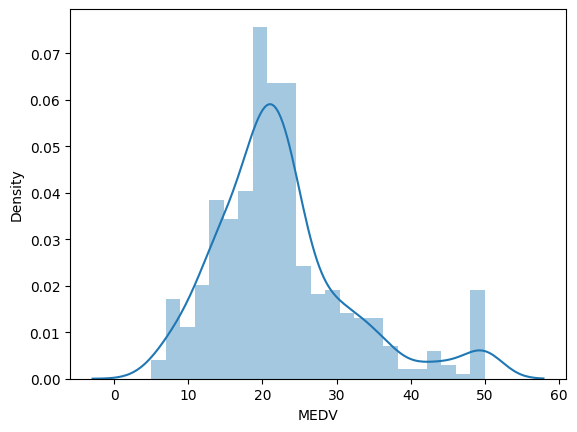

In [29]:
sns.distplot(data['MEDV']);

In [38]:
print('Skewnes: %f'  %data['MEDV'].skew())
print('Kutosis: %f'  %data['MEDV'].kurt())

Skewnes: 1.108098
Kutosis: 1.495197


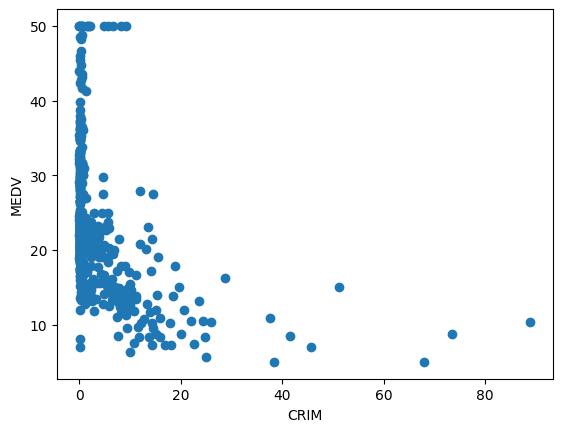

In [40]:
fig, ax = plt.subplots()
ax.scatter(x = data['CRIM'], y = data['MEDV'])
plt.ylabel('MEDV')
plt.xlabel("CRIM")
plt.show()

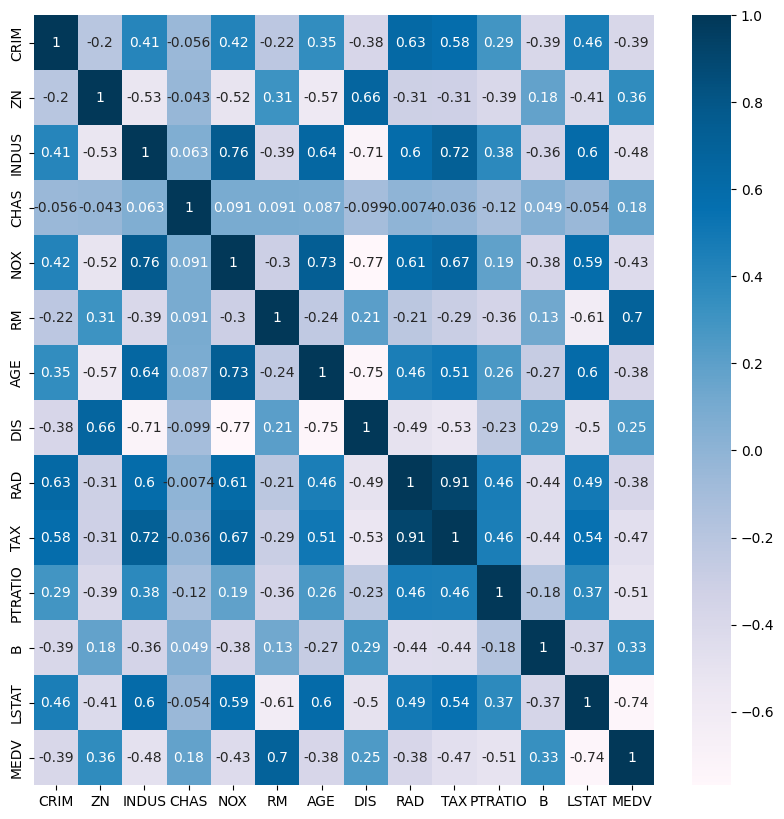

In [41]:
plt.figure(figsize=(10,10))
cor=data.corr()

sns.heatmap( cor,annot=True,cmap=plt.cm.PuBu)
plt.show()

In [44]:
from sklearn.model_selection import train_test_split
x = data.drop('MEDV', axis=1)
y = data['MEDV']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.2,random_state=42)


In [45]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(404, 13)
(102, 13)
(404,)
(102,)


In [46]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x_train,y_train)


LinearRegression()

In [48]:
preditions = model.predict(x_test)
preditions

array([28.99672362, 36.02556534, 14.81694405, 25.03197915, 18.76987992,
       23.25442929, 17.66253818, 14.34119   , 23.01320703, 20.63245597,
       24.90850512, 18.63883645, -6.08842184, 21.75834668, 19.23922576,
       26.19319733, 20.64773313,  5.79472718, 40.50033966, 17.61289074,
       27.24909479, 30.06625441, 11.34179277, 24.16077616, 17.86058499,
       15.83609765, 22.78148106, 14.57704449, 22.43626052, 19.19631835,
       22.43383455, 25.21979081, 25.93909562, 17.70162434, 16.76911711,
       16.95125411, 31.23340153, 20.13246729, 23.76579011, 24.6322925 ,
       13.94204955, 32.25576301, 42.67251161, 17.32745046, 27.27618614,
       16.99310991, 14.07009109, 25.90341861, 20.29485982, 29.95339638,
       21.28860173, 34.34451856, 16.04739105, 26.22562412, 39.53939798,
       22.57950697, 18.84531367, 32.72531661, 25.0673037 , 12.88628956,
       22.68221908, 30.48287757, 31.52626806, 15.90148607, 20.22094826,
       16.71089812, 20.52384893, 25.96356264, 30.61607978, 11.59

In [49]:
print('Actual value of the house:  -', y_test[0])
print('Predicted value of the house:  -', preditions[0])

Actual value of the house:  - 24.0
Predicted value of the house:  - 28.996723619824834
